In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


C:\Users\ayseg\AppData\Local\Temp\ipykernel_22716\1391056586.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Introduction:
For this assignment, we are tasked with selecting three distinct categories of data from the Central Bank of the Republic of Turkey. Subsequently, we will develop three separate models using these datasets. The data are selected from 01.2014 to 01.2024 as monthly. The selection of these three sets should be diverse in nature to ensure a comprehensive analysis. Therefore, we should first check the correlation of 3 datasets.
My selected datasets:
1) TP ODEMGZS RUSYA: Total Tourist Number coming from Russia to Turkey

2) TP YISGUCU2 G4: Unemployment Rate
    Economic downturns and reduced economic activity often coincide with an increase in the unemployment rate.
    
3) TP TG2 Y01: Consumer Confidence Interval
    The Consumer Confidence Index measures consumers' trends and evaluations regarding the country's economy. It serves as a leading indicator used to closely monitor economic developments in all countries. The index generates meaningful values in predicting economic growth. Among the indices related to consumer trends, an increase in the likelihood of using debt for financing consumption reflects an optimistic situation, while a decrease indicates a pessimistic situation. Similarly, an increase in indices reflecting thoughts and expectations regarding changes in consumer prices suggests an expectation of a decrease in consumer prices, while a decrease indicates an expectation of an increase in consumer prices. An increase in the unemployment expectations index signifies an anticipation of a decrease in unemployment, whereas a decrease indicates an expectation of an increase in unemployment.

My selected Google searches:
1) Rusya Ukrayna(Russia Ukrain): I would like to check the effect of the Russian-Ukranian war on the Russian tourist count comnig to Turkey. I select this keywords by thinking it would be the one searched the most about the war. 	
2) İşkur: I am expecting a relationship between this keyword and unemployement rate since people tent to search for jobs online nowadays.
3) İş ilanları	
4) Kredi	
5) Dolar kuru






In [5]:
path= "C:/Users/ayseg/Desktop/IE360/EVDS.xlsx"
evds_data= pd.read_excel(path)

# Convert the 'Date' column to datetime format
evds_data['Tarih'] = pd.to_datetime(evds_data['Tarih'], errors='coerce')


# Convert the other columns to numeric format, handling errors by coercing them to NaN
columns_to_convert = ['TP ODEMGZS RUSYA', 'TP YISGUCU2 G4', 'TP MK F BILESIK','TP TG2 Y01']
for column in columns_to_convert:
    evds_data[column] = pd.to_numeric(evds_data[column], errors='coerce')

# Check the resulting data types
evds_data.info()

evds_data.rename(columns={'Tarih': 'Date', 'TP ODEMGZS RUSYA': 'Russian Tourist Number', 'TP YISGUCU2 G4': 'Unemployment Rate', 'TP MK F BILESIK': 'BIST100 Index','TP TG2 Y01':'Consumer Confidence Index'}, inplace=True)

evds_data.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tarih             121 non-null    datetime64[ns]
 1   TP ODEMGZS RUSYA  121 non-null    int64         
 2   TP YISGUCU2 G4    121 non-null    int64         
 3   TP MK F BILESIK   121 non-null    float64       
 4   TP TG2 Y01        121 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 4.9 KB


,Date,Russian Tourist Number,Unemployment Rate,BIST100 Index,Consumer Confidence Index
116,2023-09-01,792609,3135,8334.94,71.470000
117,2023-10-01,764408,2865,7514.10,74.620000
118,2023-11-01,336087,3075,7948.60,75.470000
119,2023-12-01,225180,3146,7470.18,77.420000
120,2024-01-01,253321,3407,8496.66,80.423109


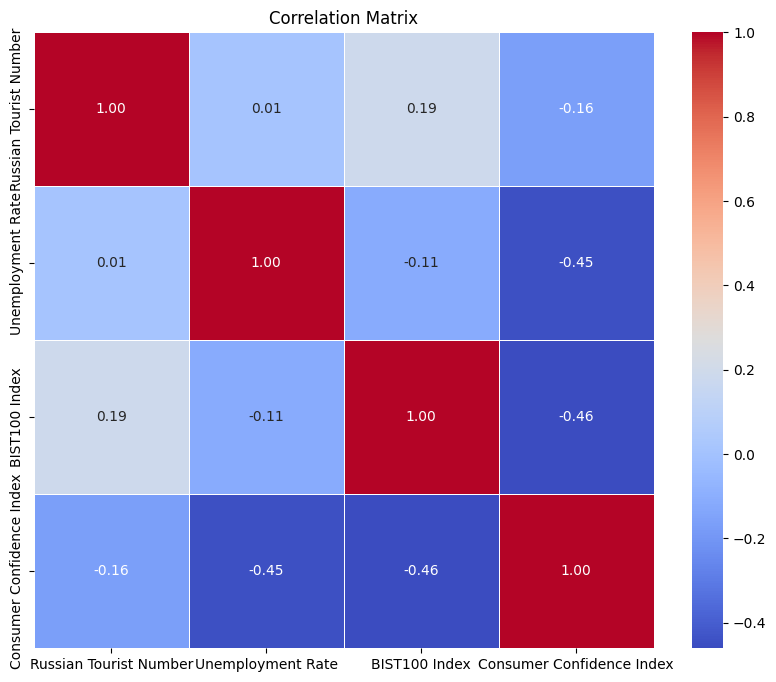

In [6]:
num_cols = evds_data.select_dtypes(include=np.number)
cor_data = num_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [80]:
trend_data_path = "C:/Users/ayseg/Desktop/IE360/multiTimeline.xlsx"

trend_data = pd.read_excel(trend_data_path)
trend_data['Month'] = pd.to_datetime(trend_data['Month'], errors='coerce')
trend_data['rusya ukrayna'] = trend_data['rusya ukrayna'].replace("<1", 1)
trend_data.head()


C:\Users\ayseg\AppData\Local\Temp\ipykernel_22716\3239913486.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trend_data['rusya ukrayna'] = trend_data['rusya ukrayna'].replace("<1", 1)


,Month,rusya ukrayna,işkur,iş ilanları,kredi,dolar kuru
0,2014-01-01,1,11,14,32,2
1,2014-02-01,1,12,15,33,2
2,2014-03-01,1,11,13,30,1
3,2014-04-01,1,11,13,34,1
4,2014-05-01,1,11,12,33,1


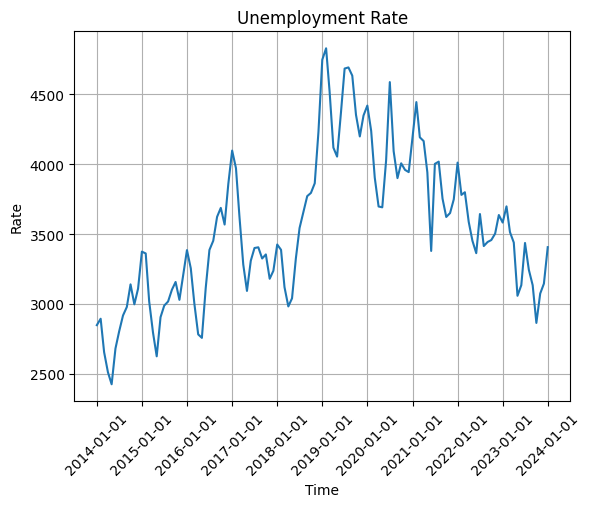

In [96]:
plt.plot(evds_data['Date'],evds_data['Unemployment Rate'])
plt.title("Unemployment Rate")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.xticks(evds_data['Date'][::12], rotation=45)
plt.grid(True)
plt.show()


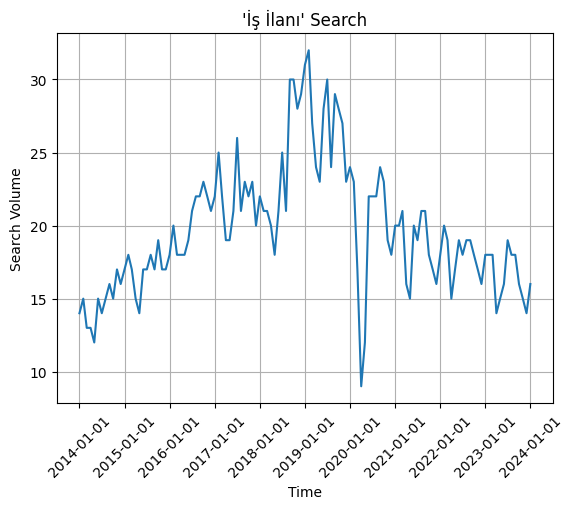

In [83]:
plt.plot(trend_data["Month"],trend_data["iş ilanları"])
plt.title("'İş İlanı' Search")
plt.xlabel("Time")
plt.ylabel("Search Volume")
plt.xticks(trend_data['Month'][::12], rotation=45)
plt.grid(True)
plt.show()

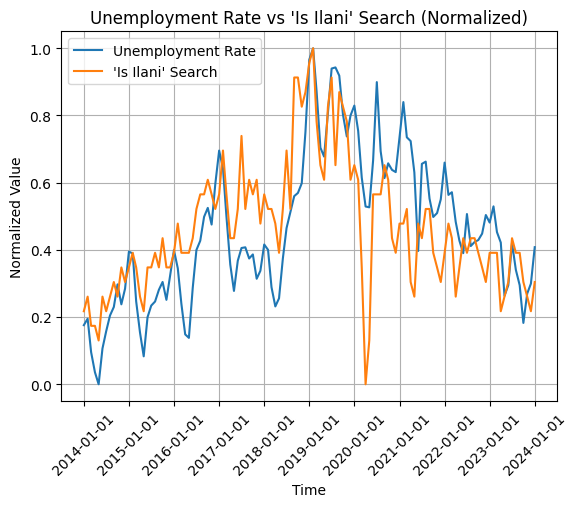

In [97]:
normalized_unemployment = ((evds_data['Unemployment Rate'] - evds_data['Unemployment Rate'].min()) / (evds_data['Unemployment Rate'].max() - evds_data['Unemployment Rate'].min()))
normalized_search = ((trend_data["iş ilanları"] - trend_data["iş ilanları"].min()) / (trend_data["iş ilanları"].max() - trend_data["iş ilanları"].min()))

# Plot both series on the same graph

# Plot normalized Unemployment Rate
plt.plot(evds_data['Date'],normalized_unemployment, label='Unemployment Rate')

# Plot normalized 'Is Ilani' Search
plt.plot(evds_data['Date'],normalized_search, label="'Is Ilani' Search")

# Add title, labels, legend, and grid
plt.title("Unemployment Rate vs 'Is Ilani' Search (Normalized)")
plt.xlabel("Time")
plt.ylabel("Normalized Value")
plt.xticks(evds_data['Date'][::12], rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Model For Unemployment:
Unemployment, a critical economic indicator, reflects the health of a nation's labor market. Understanding its dynamics involves examining various factors such as job availability, workforce participation, and economic conditions. In this model, we are diving into the intricate relationship between unemployment and  key parameters for job-related terms ('işkur' and 'iş ilanları') and the BIST100 Index, and the Consumer Confidence Index.
Since many people are looking for a job in online platforms, I expect a correlation between google searches and unemployment. Also CCI ostly signalizes people's reliance about the future in economics, therefore they can have a significant correlation.

First we try to understand the data:

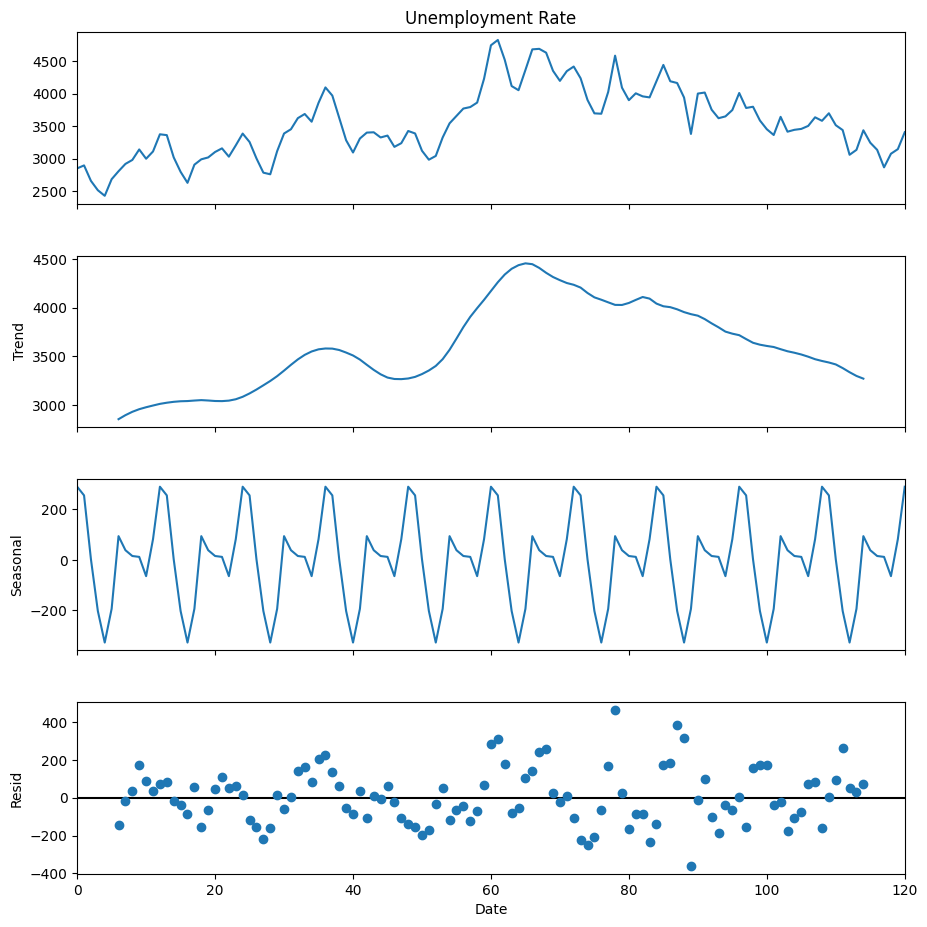

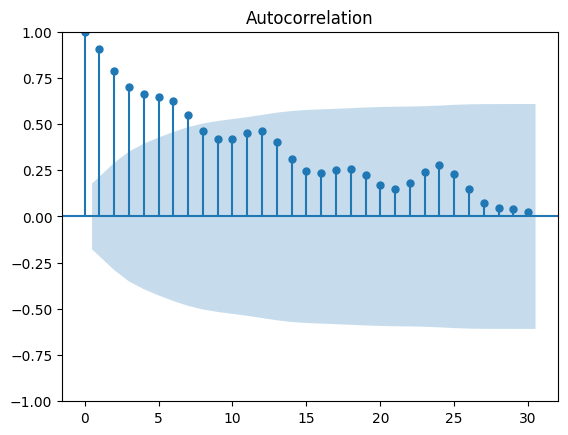

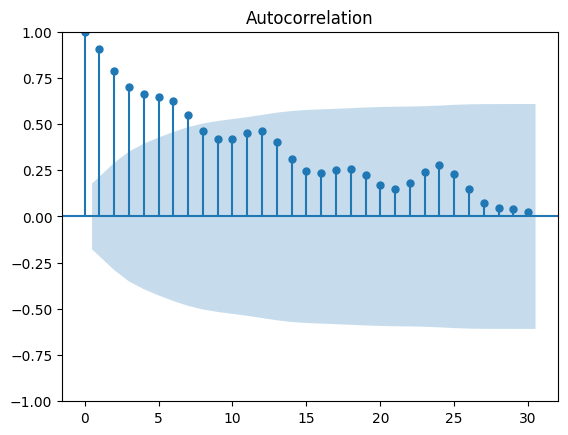

In [101]:
decomp = sm.tsa.seasonal_decompose(
evds_data['Unemployment Rate'], period=12)
decomp_plot = decomp.plot()

# Plot outcome
plt.xlabel('Date')
decomp_plot .set_figheight(10)
decomp_plot .set_figwidth(10)
plt.show()

sm.graphics.tsa.plot_acf(evds_data['Unemployment Rate'], lags=30)

Then we create a linear regression to explain the data with the variables mentioned above:

                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     54.91
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           6.75e-26
Time:                        17:36:56   Log-Likelihood:                -866.70
No. Observations:                 121   AIC:                             1743.
Df Residuals:                     116   BIC:                             1757.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

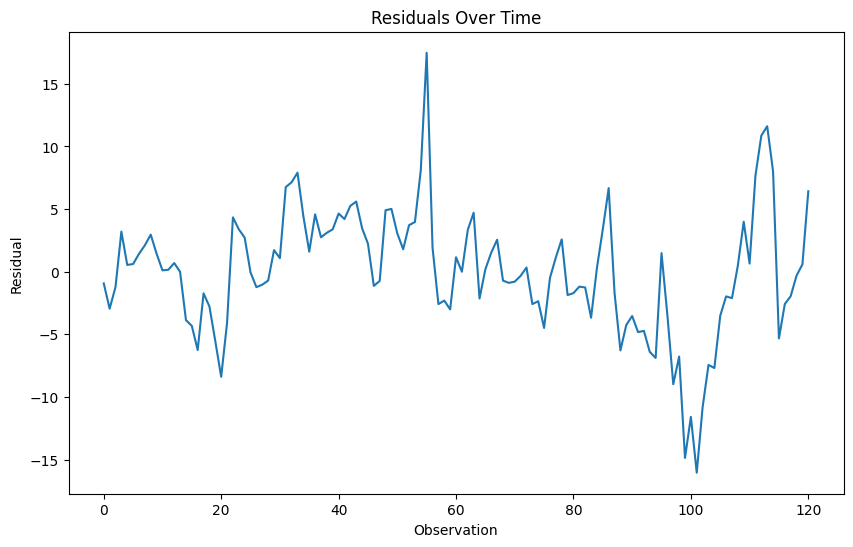

In [102]:
merged_data = pd.concat([evds_data,trend_data], axis=1)

X_unemployment = merged_data[['işkur', 'iş ilanları','BIST100 Index','Consumer Confidence Index']]
X_unemployment = sm.add_constant(X_unemployment)
y_unemployment = merged_data['Unemployment Rate']
model_unemployment = sm.OLS(y_unemployment, X_unemployment).fit()

# Print the summary of the regression results
print(model_unemployment.summary())

residuals_ccı = model_ccı.resid

# Plot the residuals over time (assuming time is the index)
plt.figure(figsize=(10, 6))
plt.plot(residuals_ccı)
plt.title('Residuals Over Time')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()


'işkur' (Google searches for 'işkur') has a coefficient of 21.3095, indicating that an increase in Google searches for 'işkur' is associated with an increase of approximately 21.31 in the Unemployment Rate. This coefficient is statistically significant at the 0.05 level.
'iş ilanları' (Google searches for 'iş ilanları') has a coefficient of 64.9419, indicating that an increase in Google searches for 'iş ilanları' is associated with an increase of approximately 64.94 in the Unemployment Rate. This coefficient is statistically significant at the 0.05 level.
'BIST100 Index' has a coefficient of -0.0392, indicating that a one-unit increase in the BIST100 Index is associated with a decrease of approximately 0.0392 in the Unemployment Rate. This coefficient is statistically significant at the 0.05 level.
'Consumer Confidence Index' has a coefficient of -28.2715, indicating that a one-unit increase in the Consumer Confidence Index is associated with a decrease of approximately 28.27 in the Unemployment Rate. This coefficient is statistically significant at the 0.05 level.

Model For CCI:
The results of articles show there is Granger causality from the consumer confidence index to the portfolio investments made by foreign residents. This causality is also determined in the direction to equity security investments. Regression analyses indicate that the causality relationships have a positive sign. It is concluded that an increase in the consumer confidence index may lead to an increase in the domestic portfolio and equity security investments of foreign residents or, on the contrary, it will decrease. 
Therefore I am expecting to observe positive relationship between CCI and BIST100& Google searchs for credits.  


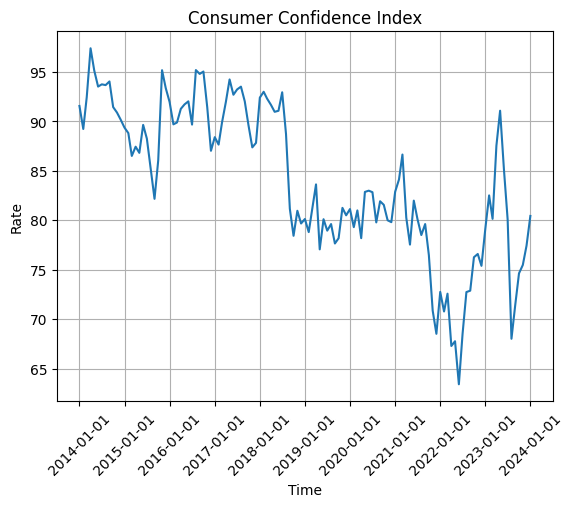

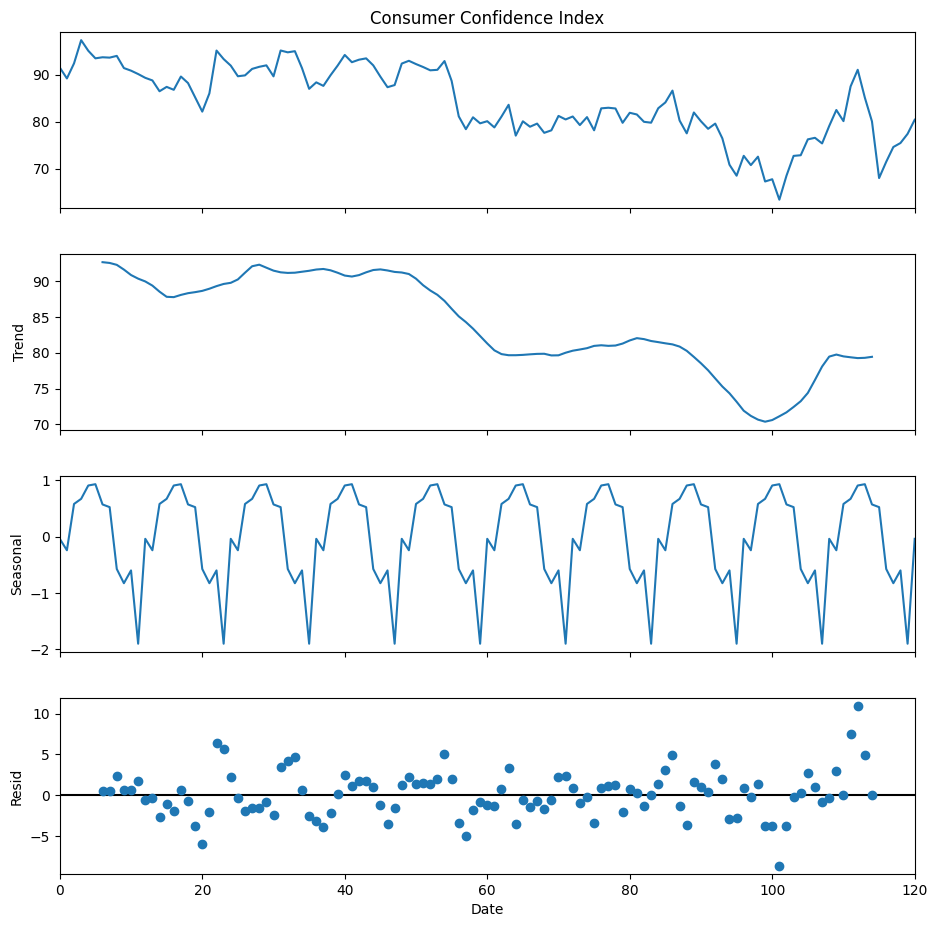

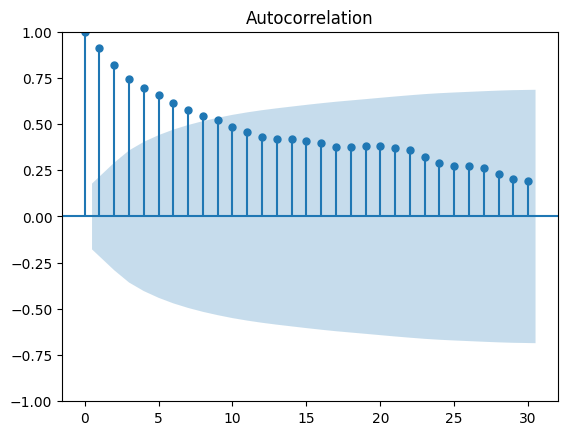

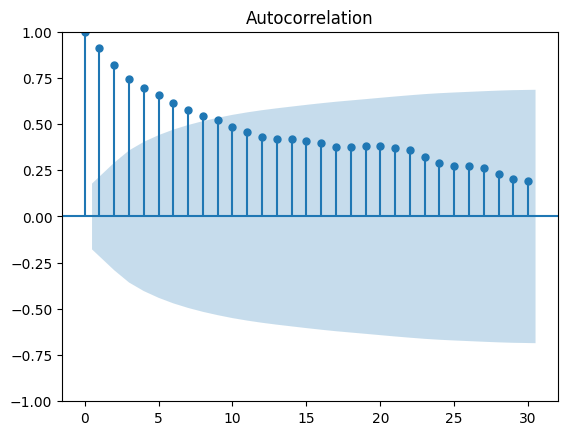

In [106]:
plt.plot(evds_data['Date'],evds_data['Consumer Confidence Index'])
plt.title("Consumer Confidence Index")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.xticks(evds_data['Date'][::12], rotation=45)
plt.grid(True)
plt.show()

decomp = sm.tsa.seasonal_decompose(
evds_data['Consumer Confidence Index'], period=12)
decomp_plot = decomp.plot()

# Plot outcome
plt.xlabel('Date')
decomp_plot .set_figheight(10)
decomp_plot .set_figwidth(10)
plt.show()

sm.graphics.tsa.plot_acf(evds_data['Consumer Confidence Index'], lags=30)


                                OLS Regression Results                               
Dep. Variable:     Consumer Confidence Index   R-squared:                       0.578
Model:                                   OLS   Adj. R-squared:                  0.564
Method:                        Least Squares   F-statistic:                     39.76
Date:                       Fri, 05 Apr 2024   Prob (F-statistic):           6.18e-21
Time:                               17:30:00   Log-Likelihood:                -365.50
No. Observations:                        121   AIC:                             741.0
Df Residuals:                            116   BIC:                             755.0
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

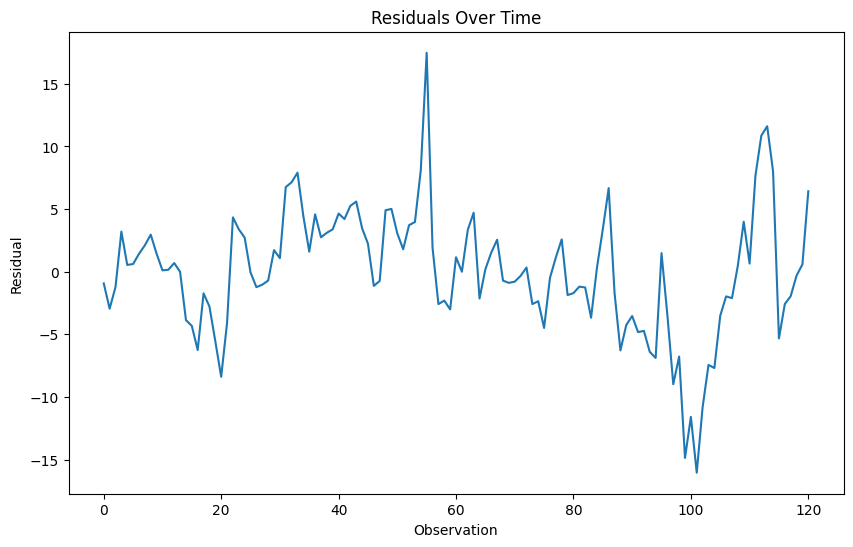

In [91]:
y_ccı = merged_data[['Consumer Confidence Index']]
x_ccı = merged_data[['kredi','dolar kuru','BIST100 Index','Unemployment Rate']]
x_ccı = sm.add_constant(x_ccı)
model_ccı = sm.OLS(y_ccı, x_ccı).fit()

# Print the summary of the regression results
print(model_ccı.summary())

residuals_ccı = model_ccı.resid

# Plot the residuals over time (assuming time is the index)
plt.figure(figsize=(10, 6))
plt.plot(residuals_ccı)
plt.title('Residuals Over Time')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()




'kredi' (credit) has a coefficient of -0.0454, which is not statistically significant at the 0.05 level, as indicated by the p-value of 0.477.
'dolar kuru' (USD/TRY exchange rate) has a coefficient of -0.1871, indicating that a one-unit increase in the exchange rate is associated with a decrease of approximately 0.1871 in the Consumer Confidence Index. This coefficient is statistically significant at the 0.05 level.
'BIST100 Index' has a coefficient of -0.0017, indicating that a one-unit increase in the BIST100 Index is associated with a decrease of approximately 0.0017 in the Consumer Confidence Index. This coefficient is statistically significant at the 0.05 level.

'Unemployment Rate' has a coefficient of -0.0053, indicating that a one-unit increase in the unemployment rate is associated with a decrease of approximately 0.0053 in the Consumer Confidence Index. This coefficient is statistically significant at the 0.05 level.
Overall, the model indicates that the USD/TRY exchange rate, BIST100 Index, and Unemployment Rate have statistically significant effects on the Consumer Confidence Index, while the credit variable does not appear to have a significant impact. The presence of positive autocorrelation and strong multicollinearity suggests that further diagnostics and potentially refining the model may be necessary for more accurate predictions.








Model For Russian Tourist Count:
I am aiming to check for the rekation between tourist count and BIST100& Search for 'Russian Ukranian War'. We observe a huge seasonality in the data. However, it is hard to normalize data in Python since it doesn't have a build in functions like R. Therefore I couldn't make the seasonal data decomposition to make the data more stationary. 

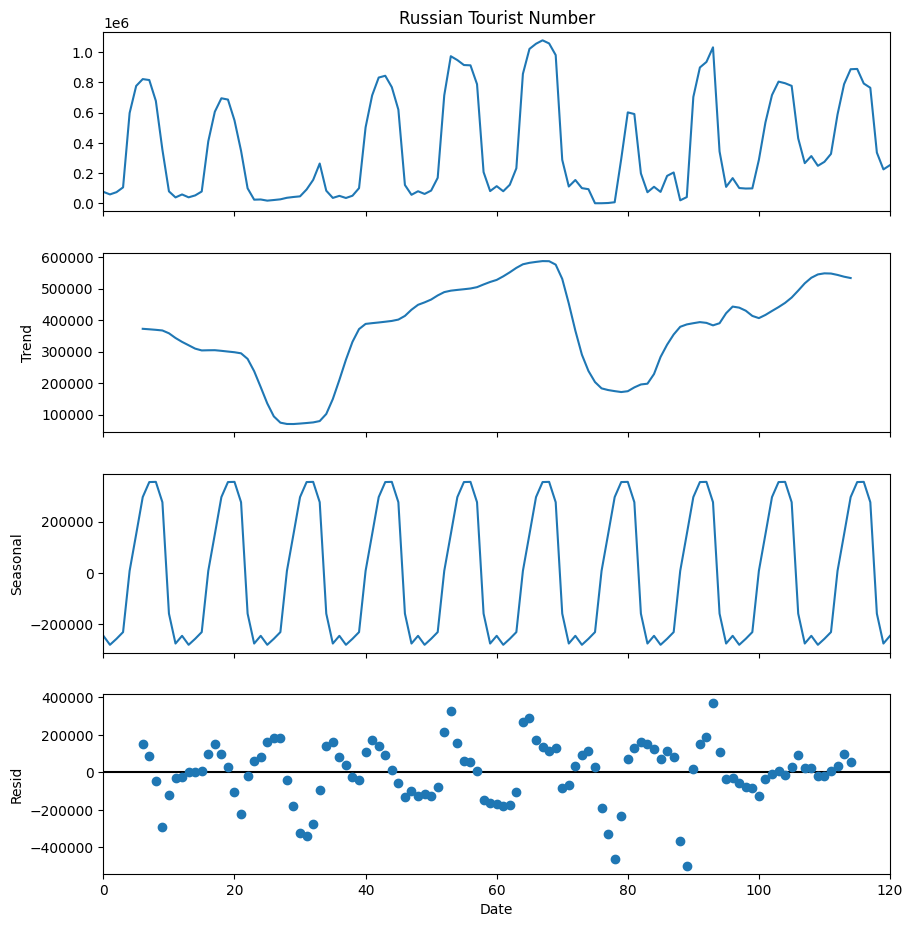

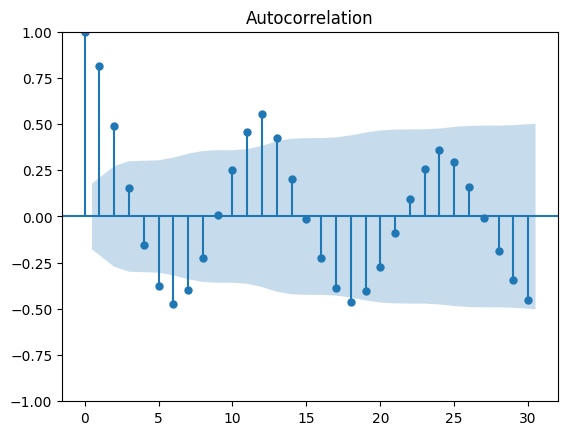

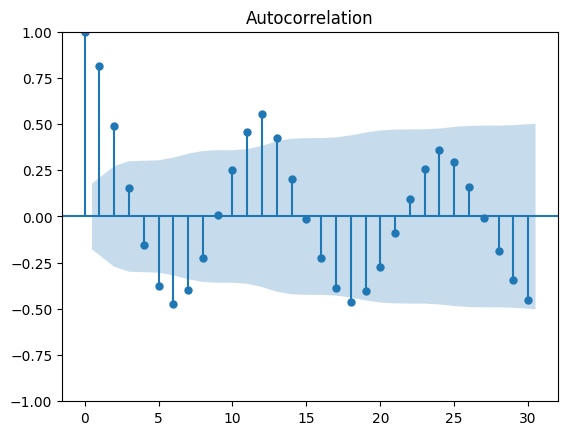

In [105]:
decomp = sm.tsa.seasonal_decompose(
evds_data['Russian Tourist Number'], period=12)
decomp_plot = decomp.plot()
plt.xlabel('Date')
decomp_plot .set_figheight(10)
decomp_plot .set_figwidth(10)
plt.show()

sm.graphics.tsa.plot_acf(evds_data['Russian Tourist Number'], lags=30)


                              OLS Regression Results                              
Dep. Variable:     Russian Tourist Number   R-squared:                       0.045
Model:                                OLS   Adj. R-squared:                  0.029
Method:                     Least Squares   F-statistic:                     2.800
Date:                    Fri, 05 Apr 2024   Prob (F-statistic):             0.0648
Time:                            17:13:35   Log-Likelihood:                -1710.5
No. Observations:                     121   AIC:                             3427.
Df Residuals:                         118   BIC:                             3435.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

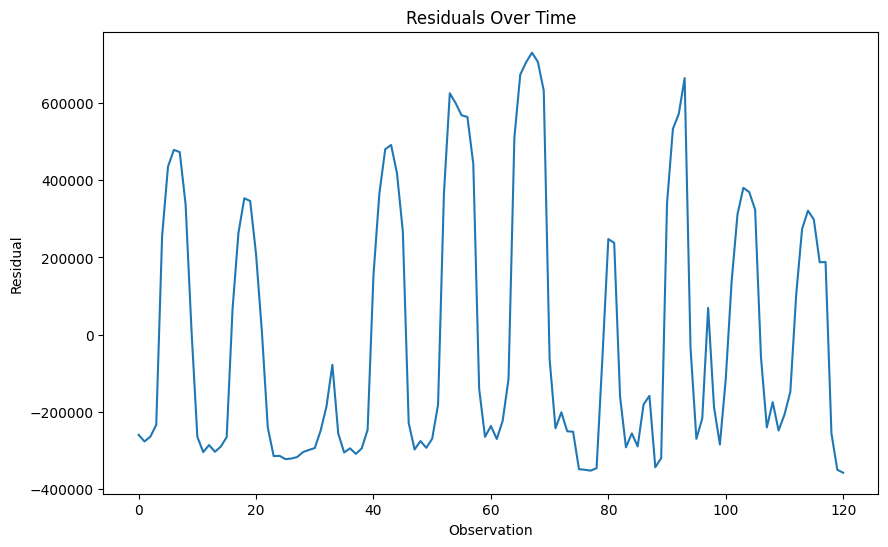

In [88]:
y_rus = merged_data[['Russian Tourist Number']]
x_rus = merged_data[['rusya ukrayna','BIST100 Index']]
x_rus = sm.add_constant(x_rus)
model_russia = sm.OLS(y_rus, x_rus).fit()

# Print the summary of the regression results
print(model_russia.summary())

# Print the summary of the regression results
print(model_russia.summary())

residuals_russia = model_russia.resid

# Plot the residuals over time (assuming time is the index)
plt.figure(figsize=(10, 6))
plt.plot(residuals_russia)
plt.title('Residuals Over Time')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

Overall, the model suggests that the BIST100 Index has a statistically significant positive relationship with the Russian Tourist Number, while the 'rusya ukrayna' variable does not have a statistically significant effect. However, the model's overall explanatory power is relatively low, indicating that other factors not included in the model may also influence the Russian Tourist Number. Further investigation and potentially refining the model with additional variables may be necessary for a more accurate prediction. I should add more variable to test the data and work on the seasonality. 

Lastly, I would like to mention that ChatGPT is used for some clarification of the codes and the paraphrasing of the commentary sections written by me. 




